<a href="https://colab.research.google.com/github/ishwarvenugopal/ML_Implementation/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [0]:
df=pd.read_csv('/content/drive/My Drive/ML_Algorithms/Data/KMeans_data.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,deg-malig,Class_no-recurrence-events,Class_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,tumor-size_0-4,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_5-9,tumor-size_50-54,inv-nodes_0-2,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,2,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [0]:
#Rearranging the columns such that the class attributes become the last column

cols=list(df.columns)
cols= cols[:1] + cols[2:] + [cols[1]]
df=df[cols]

In [0]:
# Defining Train and Test Data

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [0]:
data = X 
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

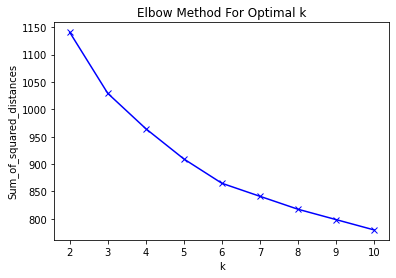

In [0]:
#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

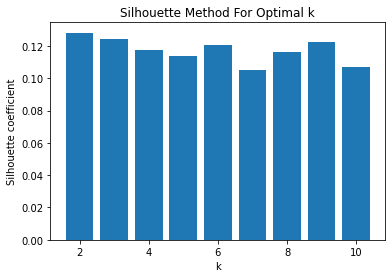

In [0]:
#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
K = range(2,11)
no_of_clusters=[]
silhouette_scores=[]

for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    preds=km.fit_predict(data_transformed)
    centers=km.cluster_centers_

    score=silhouette_score(data_transformed,preds)

    no_of_clusters.append(k)
    silhouette_scores.append(score)

plt.ylabel("Silhouette coefficient")
plt.xlabel("k")
plt.title('Silhouette Method For Optimal k')
plt.bar(no_of_clusters,silhouette_scores)
plt.show()

In [0]:
num_of_clusters = 6 # After analyzing the graphs

In [0]:
kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

array([3, 1, 3, 5, 1, 2, 3, 2, 3, 1, 3, 2, 2, 2, 3, 2, 3, 3, 2, 5, 2, 2,
       1, 3, 1, 3, 3, 5, 1, 2, 5, 1, 3, 5, 2, 3, 2, 5, 3, 3, 5, 2, 2, 3,
       5, 2, 1, 1, 1, 1, 2, 3, 3, 2, 5, 5, 5, 5, 2, 5, 3, 1, 2, 1, 3, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 2, 3, 3, 1, 5, 2, 5, 5, 3, 2, 5, 2,
       5, 1, 1, 2, 5, 5, 3, 1, 2, 5, 3, 3, 2, 5, 1, 3, 1, 1, 3, 1, 1, 5,
       2, 5, 1, 1, 1, 5, 3, 2, 1, 2, 2, 5, 2, 5, 5, 2, 0, 0, 3, 0, 0, 0,
       3, 2, 2, 1, 0, 3, 3, 3, 4, 4, 2, 3, 4, 5, 4, 3, 5, 5, 4, 2, 5, 5,
       5, 5, 3, 5, 3, 1, 0, 5, 1, 1, 0, 1, 2, 0, 3, 5, 5, 4, 1, 2, 2, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 5, 0, 3, 4, 3, 0, 2, 1, 3, 4, 3, 5, 3, 3,
       2, 3, 1, 3, 3, 1, 3, 5, 1, 1, 5, 5, 2, 3, 5, 1, 3, 1, 2, 5, 4, 0,
       4, 0, 4, 5, 0, 1, 0, 5, 4, 1, 1, 3, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 3, 1, 3, 5, 0, 0, 3, 4, 4, 5, 5, 4, 2, 4, 4, 4, 3, 3, 4, 1, 0,
       0, 4, 0, 4, 4, 0, 4, 4, 3, 3, 5, 4, 4], dtype=int32)